In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

np.random.seed(42)

In [2]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [11]:
# Create dataframe with all control records
control_df = df.query('group == "control"')

# Compute completion rate
control_ctr = sum(control_df.completed)/len(control_df.completed)

# Display completion rate
control_ctr

0.37199519230769229

In [12]:
# Create dataframe with all experiment records
experiment_df = df.query('group == "experiment"')

# Compute completion rate
experiment_ctr = sum(experiment_df.completed)/len(experiment_df.completed)

# Display completion rate
experiment_ctr

0.39353348729792148

In [13]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [14]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
for _ in range(10000):
    sample = df.sample(df.shape[0], replace = True)
    sample_control_df = sample.query('group == "control"')
    sample_control_ctr = sum(sample_control_df.completed)/len(sample_control_df.completed)
    sample_experiment_df = sample.query('group == "experiment"')
    sample_experiment_ctr = sum(sample_experiment_df.completed)/len(sample_experiment_df.completed)
    sample_obs_diff = sample_experiment_ctr - sample_control_ctr
    diffs.append(sample_obs_diff)

In [15]:
# convert to numpy array
diffs = np.array(diffs)

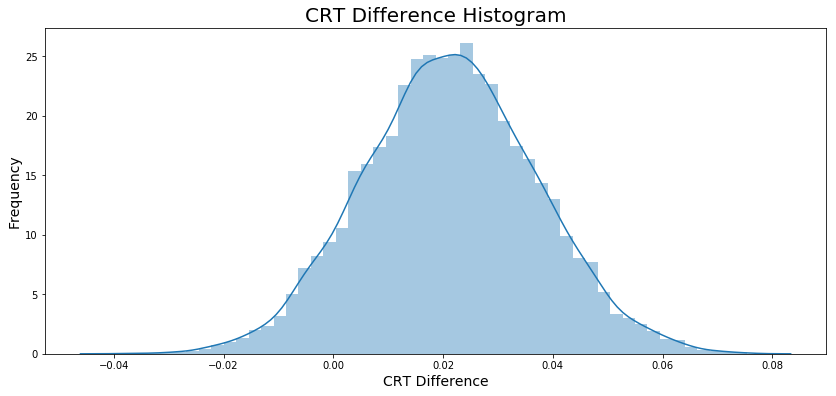

In [17]:
# plot distribution
# Plot sampling distribution
plt.figure(figsize = [14,6])
sns.distplot(diffs);
plt.title('CRT Difference Histogram', fontsize = 20)
plt.xlabel('CRT Difference', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.show()

In [18]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(diffs), size = 10000);

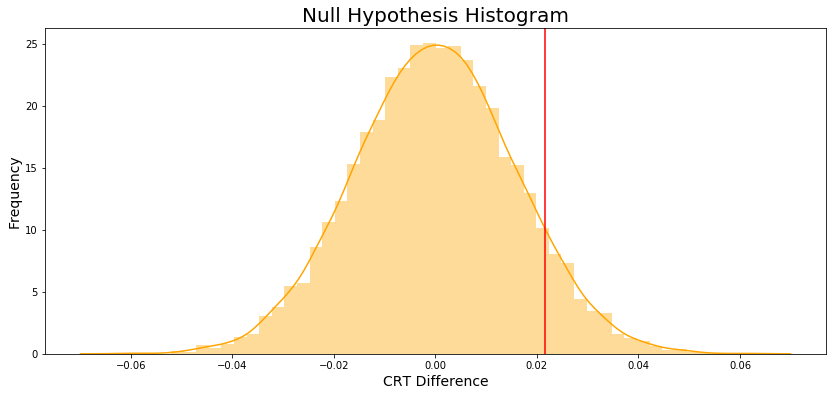

In [19]:
# plot null distribution
plt.figure(figsize = [14,6])
sns.distplot(null_vals, color = 'orange');
plt.title('Null Hypothesis Histogram', fontsize = 20)
plt.xlabel('CRT Difference', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.axvline(obs_diff, color = 'red')
plt.show()

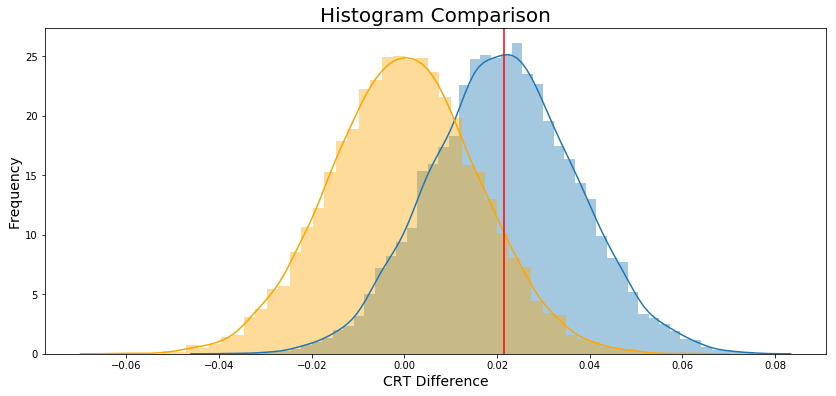

In [20]:
# Plot observed statistic with the null distibution
plt.figure(figsize = [14,6])
sns.distplot(diffs);
sns.distplot(null_vals, color = 'orange');
plt.title('Histogram Comparison', fontsize = 20)
plt.xlabel('CRT Difference', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.axvline(obs_diff, color = 'red')
plt.show()

In [21]:
# Compute p-value
p_value = (null_vals > obs_diff).mean()

# Printting the p_value
p_value

0.087499999999999994